In [1]:
import pymongo
import json
import pprint
import math
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from pymongo import MongoClient
client = MongoClient()
client = MongoClient('localhost', 27018)
db = client.tiktok

## TODO



# General Analysis


In [2]:
# Hastags to compare
p1_hashtags = ["sad", "depression", "badday", "verlust", "trennung", "traurig", "introvert", "drama"]
p2_hashtags = ["funny", "prank", "comedy", "funnyvideos", "lol", "haha", "hahaha", "funnyvideo", "pranks", "lustig", "humor", "humour", "lachdochmal"]
p3_hashtags = ["asmr", "satisfying", "oddlysatisfying", "satisfyingvideo", "handmade", "asmrsounds", "asmrvideo", "relax", "asmrtiktoks", "relaxing"]
p4_hashtags = ["cat", "cats", "catsoftiktok", "cattok", "kitty", "catlovers", "babycat", "katze"]

# Profile Analysis

In [7]:
endtime = 1000*datetime.datetime(2022, 11, 30, 0, 0, 0).timestamp() # 
starttime = 1000*datetime.datetime(2022, 11, 1, 0, 0, 0).timestamp()

profile_watchtime = db.sessions.aggregate([
    {
        "$match":{
            "timing.start":{
                "$gte":starttime
            },
            "timing.end":{
                "$lte":endtime
            }
        }
    },
    { "$group": {
      "_id": "$profile",
      #"watch_millisecs": { "$sum": "$watchtime" } ,
    "scrolled_hours": { "$sum": {"$divide": ["$timing.duration",3600000]} } ,  
    "watched_videos_with_profile_tags": { "$sum": {"$divide": ["$watchtime",3600000]} } 

    }}])

for p in profile_watchtime:
    p["perc_on_tags"] = math.floor(10000*p["watched_videos_with_profile_tags"]/p["scrolled_hours"])/100
    print(p)


{'_id': 'p6_islam', 'scrolled_hours': 11.957464444444444, 'watched_videos_with_profile_tags': 3.0516666666666667, 'perc_on_tags': 25.52}
{'_id': 'p4_cats', 'scrolled_hours': 11.739690833333334, 'watched_videos_with_profile_tags': 2.051111111111111, 'perc_on_tags': 17.47}
{'_id': 'l3_asmr', 'scrolled_hours': 12.006644444444444, 'watched_videos_with_profile_tags': 7.064722222222223, 'perc_on_tags': 58.84}
{'_id': 'p3_asmr', 'scrolled_hours': 11.41008861111111, 'watched_videos_with_profile_tags': 3.075833333333333, 'perc_on_tags': 26.95}
{'_id': 'p7_polizei', 'scrolled_hours': 11.462594444444445, 'watched_videos_with_profile_tags': 1.5177777777777777, 'perc_on_tags': 13.24}
{'_id': 'p1_sad', 'scrolled_hours': 11.70830861111111, 'watched_videos_with_profile_tags': 1.6991666666666667, 'perc_on_tags': 14.51}
{'_id': 'p0_baseline', 'scrolled_hours': 34.33594083333333, 'watched_videos_with_profile_tags': 0.0, 'perc_on_tags': 0.0}
{'_id': 'p15_climate', 'scrolled_hours': 34.800963055555556, 'wa

In [4]:
endtime = 1000*datetime.datetime(2022, 9, 15, 0, 0, 0).timestamp() # 
starttime = 1000*datetime.datetime(2022, 6, 1, 0, 0, 0).timestamp()
df = pd.DataFrame({"_id":[], "scrolled_hours":[], "watched_videos_with_profile_tags":[], "perc_on_tags":[]})
while endtime < 1000 * time.time():   
    profile_watchtime = db.sessions.aggregate([
        {
            "$match":    
                {
                "profile":"p6_islam",
                "timing.start":{
                    "$gte":starttime
                },
                "timing.end":{
                    "$lte":endtime
                }
            }
        },
        { "$group": {
          "_id": "$profile",
          #"watch_millisecs": { "$sum": "$watchtime" } ,
        "scrolled_hours": { "$sum": {"$divide": ["$timing.duration",3600000]} } ,  
        "watched_videos_with_profile_tags": { "$sum": {"$divide": ["$watchtime",3600000]} } 

        }}])

    for p in profile_watchtime:
        p["perc_on_tags"] = math.floor(10000*p["watched_videos_with_profile_tags"]/p["scrolled_hours"])/100
        df.loc[len(df.index)] = [p["_id"], p["scrolled_hours"], p["watched_videos_with_profile_tags"], p["perc_on_tags"]]
        
    
    endtime +=360000


KeyboardInterrupt: 

In [ ]:
df

In [ ]:
ax = plt.gca()
df[df["_id"] == "p0_baseline"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='green', label="Watch Nothing")
plt.title("Profile0: baseline")
plt.show()


ax = plt.gca()
df[df["_id"] == "l1_sad_double"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='green', label="Watch twice, not logged in")
df[df["_id"] == "l1_sad"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='red', label="Watch once, logged in")
df[df["_id"] == "p1_sad"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='blue', label="Watch once, not logged in")
df[df["_id"] == "f1_sad"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
df[df["_id"] == "n1_sad"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='violet', label="Cluster based, Watch twice, search in desc")
plt.title("Profile1: Sad")
plt.show()

ax = plt.gca()
df[df["_id"] == "l2_funny_double"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='green', label="Watch twice, not logged in")
df[df["_id"] == "p2_funny"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='blue', label="Watch once, not logged in")
df[df["_id"] == "f2_funny"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
plt.title("Profile2: Funny")
plt.show()

ax = plt.gca()
df[df["_id"] == "l3_asmr_double"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='green', label="Watch twice, not logged in")
df[df["_id"] == "l3_asmr"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='red', label="Watch once, logged in")
df[df["_id"] == "p3_asmr"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='blue', label="Watch once, not logged in")
plt.title("Profile3: ASMR")
plt.show()

ax = plt.gca()
df[df["_id"] == "l4_cats_double"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='green', label="Watch twice, not logged in")
df[df["_id"] == "p4_cats"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='blue', label="Watch once, not logged in")
df[df["_id"] == "f4_cats"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
df[df["_id"] == "n4_cats"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='violet', label="Cluster based, Watch twice, search in desc")
plt.title("Profile4: Cats")
plt.show()

ax = plt.gca()
df[df["_id"] == "p6_islam"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
plt.title("Profile6: Islam")
plt.show()

ax = plt.gca()
df[df["_id"] == "p7_polizei"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
plt.title("Profile7: Polizei")
plt.show()

ax = plt.gca()
df[df["_id"] == "p8_deutschland"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
df[df["_id"] == "g8_deutschland"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='violet', label="Cluster based, Watch twice, search in desc")
plt.title("Profile8: Deutschland")
plt.show()

ax = plt.gca()
df[df["_id"] == "m9_spooky"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
plt.title("Profile9: Spooky")
plt.show()

ax = plt.gca()
df[df["_id"] == "m10_schule"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
plt.title("Profile10: Schule")
plt.show()

ax = plt.gca()
df[df["_id"] == "m11_fishing"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
plt.title("Profile11: Fishing")
plt.show()

ax = plt.gca()
df[df["_id"] == "m12_beauty"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
plt.title("Profile12: Beauty")
plt.show()

ax = plt.gca()
df[df["_id"] == "m14_ukrain"].plot(x="scrolled_hours", y="perc_on_tags",ax=ax, color='orange', label="Watch twice, search in desc")
plt.title("Profile14: Ukrain")
plt.show()

In [ ]:
def findSessions(profile, aftertime):
    sessions = db.sessions.find(
     {
      "profile":profile,
      "timing.start": {"$gte":aftertime}
    }).distinct("name")
    return sessions

def customSort(k):
    return k['occurence']

# get session after specific timestap
def getHashtagData(profile, sincewhen):
    
    
    sessions = []
    numvids = 0
    for s in findSessions(profile,sincewhen):
        sessions.append({"sessions":s})
        numvids += db.videos.count_documents({"sessions":s})
    
    
    print(len(sessions), "sessions with", numvids, "videos")
    agg = db.videos.aggregate([
        {
            '$unwind': {
                'path': '$textExtra', 
                'includeArrayIndex': 'string'
            }
        },{
            '$match': {
                  "profiles":profile,
                  "$or": sessions
            }
        },{
            '$group': {
                '_id': '$textExtra.hashtagName', 
                'occurences': {
                    '$sum': 1
                }
            }
        }
    ])
    allvids = []
    for r in agg:
        if r["occurences"] > 10:
            allvids.append({"hashtag":r["_id"], "occurence": int(r["occurences"]), "percentage": math.floor(10000*r["occurences"]/numvids)/100 })

    allvids.sort(key=customSort, reverse=True)
    return [numvids, allvids]

def getPercentage(hashtaglist, searchht):
    filtered_arr = [p for p in hashtaglist if p['hashtag']==searchht]
    if len(filtered_arr) == 0:
        filtered_arr = [{'hashtag':searchht, 'occurence': 0, 'percentage': 0}]
    return filtered_arr

def compareProfiles(profile1, profile2, hashtags, sinceWhen):
    print("\n\nComparing",profile1,"with",profile2)
    p1ht = getHashtagData(profile1, sincewhen)
    print(p1ht[0], "vids for", profile1)
    for ht in hashtags:
        print(getPercentage(p1ht[1], ht))

    p2ht = getHashtagData(profile2, sincewhen)
    print(p2ht[0], "vids for", profile2)
    for ht in hashtags:
        print(getPercentage(p2ht[1], ht))

In [36]:
sincewhen = 1655596800000+3600000 # last 24 hours

# Hastag Occurence
compareProfiles("p0_baseline", "p1_sad", p1_hashtags, sincewhen)
compareProfiles("l0_baseline", "l1_sad", p1_hashtags, sincewhen)
#compareProfiles("p0_baseline", "p2_funny", p2_hashtags, sincewhen)
compareProfiles("p0_baseline", "p3_asmr", p3_hashtags, sincewhen)
compareProfiles("l0_baseline", "l3_asmr", p3_hashtags, sincewhen)
#compareProfiles("p0_baseline", "p4_cats", p4_hashtags, sincewhen)




Comparing p0_baseline with p1_sad
4 sessions with 1495 videos
1495 vids for p0_baseline
[{'hashtag': 'sad', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'depression', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'badday', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'verlust', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'trennung', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'traurig', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'introvert', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'drama', 'occurence': 0, 'percentage': 0}]
2 sessions with 1076 videos
1076 vids for p1_sad
[{'hashtag': 'sad', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'depression', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'badday', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'verlust', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'trennung', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'traurig', 'occurence': 0, 'percentage': 0}]
[{'hashtag': 'introvert', 'occurence': 0, 'percenta

In [100]:
# Extend hashtags for profiles.
# Look for tags that are used in combination with profile tags but less present in baseline

from bson.code import Code
mymap = Code("function() {"
    "var tags = this.textExtra;"
    "var k = tags.length;"
    "plist = ['ukrain', 'russia', 'uk', 'conflict', 'militaryedit'];"
    "for (var i = 0; i < k; i++) {"
    "    for (var j = 0; j < i; j++) {"
    "        if (plist.indexOf(tags[i].hashtagName) >= 0 && tags[i].hashtagName != tags[j].hashtagName && tags[i].hashtagName != '' && tags[j].hashtagName != '') { "
    "            var ts = [tags[i].hashtagName, tags[j].hashtagName].sort(); "
    "            emit({ 't0' : ts[0], 't1' : ts[1] }, 1) "
    "        }"
    "    }"
    "}}"
)
reduce = Code("function (key, values){ return Array.sum(values) }")
results = db.videos.map_reduce(mymap, reduce, "hashtag_2grams_ukr")

In [101]:
results = db.hashtag_2grams_ukr.find({"value":{"$gte":1}})
for r in results:
    print(r["_id"]["t0"], r["_id"]["t1"], r["value"])


1minute uk 1.0
2022 russia 1.0
2022 uk 1.0
20min russia 1.0
20minuten russia 1.0
30bganthem uk 1.0
3d russia 1.0
3dprinter uk 1.0
3dprinting russia 1.0
3dprinting uk 1.0
4u uk 8.0
50cent uk 1.0
a russia 1.0
a380 uk 1.0
actor uk 6.0
adventure uk 1.0
afgh uk 1.0
africa uk 4.0
ahsan12145 uk 1.0
airbus uk 1.0
airbusa380 uk 1.0
aircraft russia 1.0
airdefense russia 1.0
akp russia 1.0
albania russia 1.0
albania uk 4.0
albanianboy uk 1.0
alexfunfacts russia 1.0
alive russia 1.0
allah uk 2.0
altontowers uk 1.0
amazing uk 3.0
amazonfinds uk 1.0
ambulance uk 1.0
america russia 2.0
america uk 10.0
amric uk 1.0
amusementpark uk 1.0
andrewtate uk 1.0
angeloscb russia 1.0
angriff russia 1.0
animals uk 1.0
anime uk 1.0
antoinegriezmanntiktok russia 1.0
arab uk 5.0
arabtiktok uk 3.0
arcade uk 1.0
argument conflict 1.0
arma3 russia 2.0
army russia 1.0
arndale uk 1.0
arronlambo uk 1.0
art russia 1.0
artillery russia 1.0
artist0719 uk 1.0
artur russia 1.0
asia russia 1.0
asian uk 1.0
asmr uk 5.0
asmrsoun

In [ ]:

# Question:
# Are "DiversificationLabels" assigned even when there is not Hashtag?
i = 0;
while i < 10: 
    divLabelsExistbutnohashtag = db.videos.count_documents({"diversificationLabels":{"$size":i}, "textExtra":{"$size":0}})
    print(i, divLabelsExistbutnohashtag)
    i+=1

# max 3 labels
# 1199 von 5879 haben keine tags; 85 haben div labels; 21 haben divLAbes aber keine Tags
# -> Result: 1,4% of videos have divlabels; 1,7% of those without tags have labels (not really higher)

# Followup Questions: When and how are labels assigned? Hypothesis: only on high frequency videos (could mean not all uploads are categorized with CV)

# Hashtag Combinations

In [8]:
# Export Hashtag occurences for a specific profile

from bson.code import Code
mymap = Code("function() {"
    "var tags = this.textExtra;"
    "var k = tags.length;"
    "for (var i = 0; i < k; i++) {"
    "    for (var j = 0; j < i; j++) {"
    "        if (this.isAd == false && this.profiles.indexOf('p15_climate') >= 0 && tags[i].hashtagName != tags[j].hashtagName && tags[i].hashtagName != '' && tags[j].hashtagName != '') { "
    "            var ts = [tags[i].hashtagName, tags[j].hashtagName].sort(); "
    "            emit({ 't0' : ts[0], 't1' : ts[1] }, 1) "
    "        }"
    "    }"
    "}}"
)
reduce = Code("function (key, values){ return Array.sum(values) }")
results = db.videos.map_reduce(mymap, reduce, "hashtag_2grams_climate_20221109")

In [15]:
results = db.hashtag_2grams_baseline_20220914.find({"value":{"$gte":2}})
with open('data/hashtag_2grams_climate_20221109_hashtags.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csvwriter.writerow(["source", "target", "weight"])
    for r in results:
        if (r["_id"]["t0"] in ["climate", "climatechange", "gretathunberg", "sustainable", "climatecrisis", "plasticpollution", "warming", "globalwarming", "microplastics","wildfires", "savetheplanets"] or r["_id"]["t1"] in ["climate", "climatechange", "gretathunberg", "sustainable", "climatecrisis", "plasticpollution", "warming", "globalwarming", "microplastics", "wildfires", "savetheplanets"]):
            csvwriter.writerow([r["_id"]["t0"], r["_id"]["t1"], r["value"]])

# Video Views ind Bubbles

In [224]:
def viewcount(profile):
    agg = db.videos.aggregate([
        {
            '$match': {
                'profiles': profile
            }
        }, {
            '$bucket': {
                'groupBy': '$stats.playCount', 
                'boundaries': [
                    0, 10000, 100000, 1000000, 10000000, 100000000, 999999999999
                ]
            }
        }
    ])
    results = []
    sum = 0
    for a in agg:
        results.append(a)
        sum += a["count"]
    for a in results:
        a["perc"] = a["count"]/sum
    parsed = []
    for a in results:
        parsed.append([profile, a["_id"], a["count"], a["perc"]])
    return parsed

In [225]:

df_views = pd.DataFrame({"profil":[],"group":[], "count":[], "perc":[]})
for c in viewcount("f2_funny"):
    df_views.loc[len(df_views.index)] = c
for c in viewcount("p8_deutschland"):
    df_views.loc[len(df_views.index)] = c
for c in viewcount("p3_asmr"):
    df_views.loc[len(df_views.index)] = c
for c in viewcount("p0_baseline"):
    df_views.loc[len(df_views.index)] = c


# How many views do videos in specific bubbles have

In [226]:
df_views

,profil,group,count,perc
0,f2_funny,0,105,0.002376
1,f2_funny,10000,1320,0.029874
2,f2_funny,100000,21074,0.476938
3,f2_funny,1000000,17381,0.393360
4,f2_funny,10000000,4248,0.096139
5,f2_funny,100000000,58,0.001313
6,p8_deutschland,0,85,0.002250
7,p8_deutschland,10000,1089,0.028832
8,p8_deutschland,100000,18197,0.481772
9,p8_deutschland,1000000,14530,0.384687


# Results 
the percentage of videos with less than 1000 views is suprisingly the highes is the baseline set (5.2% vs. max 3% in the other). There is also a fraction <0.2% of videos that has 0 views?

profil
f2_funny          AxesSubplot(0.125,0.125;0.775x0.755)
p0_baseline       AxesSubplot(0.125,0.125;0.775x0.755)
p3_asmr           AxesSubplot(0.125,0.125;0.775x0.755)
p8_deutschland    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

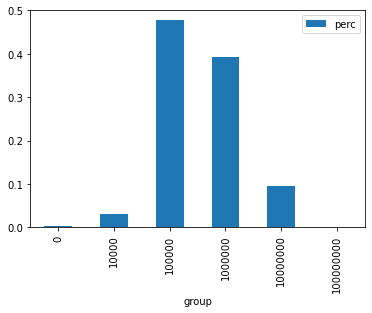

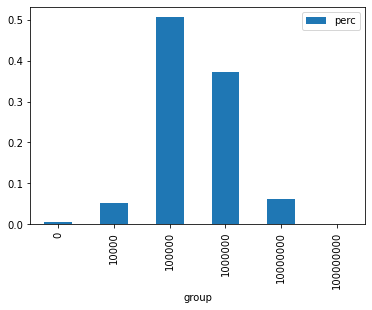

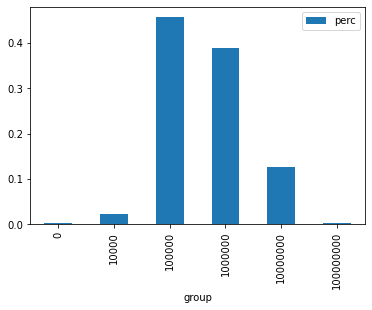

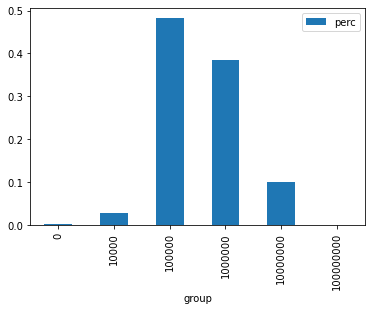

In [227]:

df_views.groupby(["profil"]).plot(kind='bar', x="group", y="perc")
